In [9]:
# Description: This program uses an artificial recurrent neural network calls Long SHort Term Memory (LSTM)
# to predict the clsing stock price of a corporation (Aple Inc.) using the past 60 day stock price

In [11]:
# Install neccessary packages
!pip install yfinance
!pip install matplotlib
!pip install keras
!pip install tensorflow

In [13]:
# Import libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf


plt.style.use('fivethirtyeight')

In [67]:
# Get the stock quote
# Use yfinanca to download data
data = yf.download("AAPL", start="2019-01-01", end="2024-11-27")

# Create a Pandas DataFrame
df = pd.DataFrame(data)

# Show the data
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2019-01-02 00:00:00+00:00,37.708595,39.480000,39.712502,38.557499,38.722500,148158800
2019-01-03 00:00:00+00:00,33.952534,35.547501,36.430000,35.500000,35.994999,365248800
2019-01-04 00:00:00+00:00,35.401955,37.064999,37.137501,35.950001,36.132500,234428400
2019-01-07 00:00:00+00:00,35.323143,36.982498,37.207500,36.474998,37.174999,219111200
2019-01-08 00:00:00+00:00,35.996521,37.687500,37.955002,37.130001,37.389999,164101200
...,...,...,...,...,...,...
2024-11-20 00:00:00+00:00,229.000000,229.000000,229.929993,225.889999,228.059998,35169600
2024-11-21 00:00:00+00:00,228.520004,228.520004,230.160004,225.710007,228.880005,42108300


In [68]:
#Dropping Tickers
df.columns = df.columns.droplevel(level='Ticker')
df

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-01-02 00:00:00+00:00,37.708595,39.480000,39.712502,38.557499,38.722500,148158800
2019-01-03 00:00:00+00:00,33.952534,35.547501,36.430000,35.500000,35.994999,365248800
2019-01-04 00:00:00+00:00,35.401955,37.064999,37.137501,35.950001,36.132500,234428400
2019-01-07 00:00:00+00:00,35.323143,36.982498,37.207500,36.474998,37.174999,219111200
2019-01-08 00:00:00+00:00,35.996521,37.687500,37.955002,37.130001,37.389999,164101200
...,...,...,...,...,...,...
2024-11-20 00:00:00+00:00,229.000000,229.000000,229.929993,225.889999,228.059998,35169600
2024-11-21 00:00:00+00:00,228.520004,228.520004,230.160004,225.710007,228.880005,42108300
2024-11-22 00:00:00+00:00,229.869995,229.869995,230.720001,228.059998,228.059998,38168300


In [69]:
# GEt the number of rows and columns in the data set
df.shape

(1487, 6)

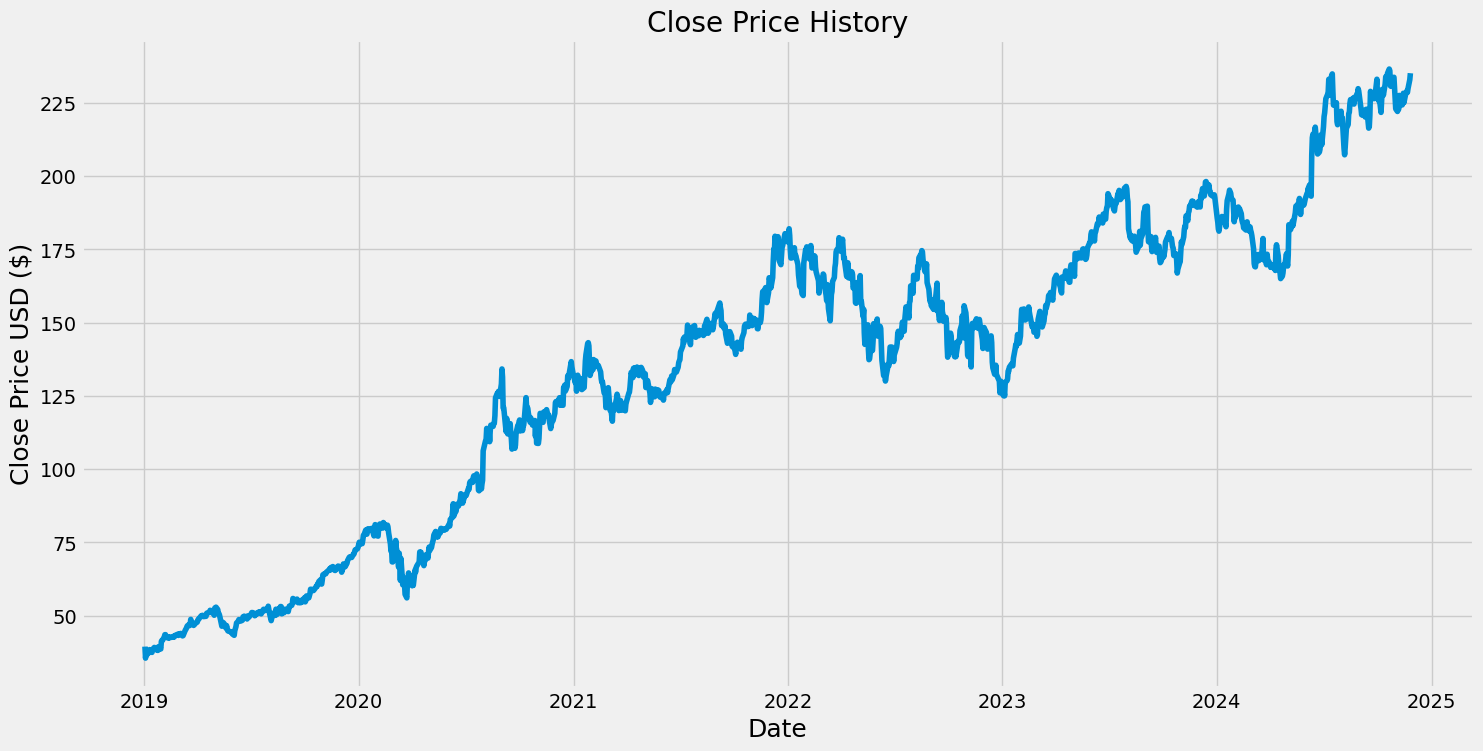

In [70]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [71]:
# Create a new datafram with only the 'Close' cloumn
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1190

In [74]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01957124],
       [0.        ],
       [0.00755228],
       ...,
       [0.96710338],
       [0.98203376],
       [0.99293296]])

In [75]:
# Create the training dataset
# Crete the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = [] #Independent variables
y_train = [] #target verial or dependent variables

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.01957124, 0.        , 0.00755228, 0.00714169, 0.01065034,
       0.01383549, 0.01444515, 0.0125664 , 0.00971719, 0.01353689,
       0.01586354, 0.0170082 , 0.01820264, 0.01382305, 0.01459445,
       0.01307652, 0.01937217, 0.01755565, 0.01554003, 0.02869122,
       0.03017182, 0.03027136, 0.03615642, 0.03980191, 0.03987658,
       0.03577072, 0.0351113 , 0.03389197, 0.03570851, 0.03482512,
       0.03559653, 0.03512373, 0.03575827, 0.03712689, 0.03592002,
       0.03829644, 0.03986413, 0.03998855, 0.04066041, 0.03852039,
       0.04078484, 0.04187974, 0.04148159, 0.04022495, 0.03771167,
       0.03822179, 0.04567453, 0.04817538, 0.04917075, 0.05168402,
       0.05465765, 0.05702164, 0.05516778, 0.05719583, 0.06581812,
       0.06079156, 0.05791747, 0.05549126, 0.05758153, 0.05789258])]
[0.05942293514916719]



In [76]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [77]:
# Reshape the data (Reshaping because the LSTM model requires a 3D in form of number of samples, number of time steps, number of features)
# Samples: The number of independent time series or sequences you have in your data.
# Timestamps: The length of each sequence (number of time steps).
# Features: The number of features or variables you have at each time step.

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1130, 60, 1)

In [78]:
# Build the LSTM model
# number of neurons = 5
#number os timestamps = 60
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))

# Second LSTM layer
model.add(LSTM(50, return_sequences=False))

# Add 2 Dense layer
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [79]:
# Compile the model
# An optimizer is used to measure the loss function and the loss function is how well it did in training
model.compile(optimizer='adam', loss='mean_squared_error')

In [80]:
# Train the model
#fit is another name for train
#batch size is the total number of training example present in a single batch
# epochs is the number of iteration when an entire dataset is past forward and backward through a nueral network
model.fit(x_train, y_train, batch_size=1, epochs=1)

1130/1130 ━━━━━━━━━━━━━━━━━━━━ 35s 29ms/step - loss: 0.0052


In [81]:
# Create the testing data set
# Create a new array containing scaled values from index 1130 to 1487
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [83]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [84]:
#Reshape the data for 2D to 3D because LSTM requesires a 3D shaped data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [85]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


In [86]:
#Get the root mean squared error (RMSE)
# RMSE is a good measure of how accurate the model predict teh response
# it is the standard deviation of the residuals
# the law value indicates a better fit

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.896644104209412

<ipython-input-87-f16f1a6220f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


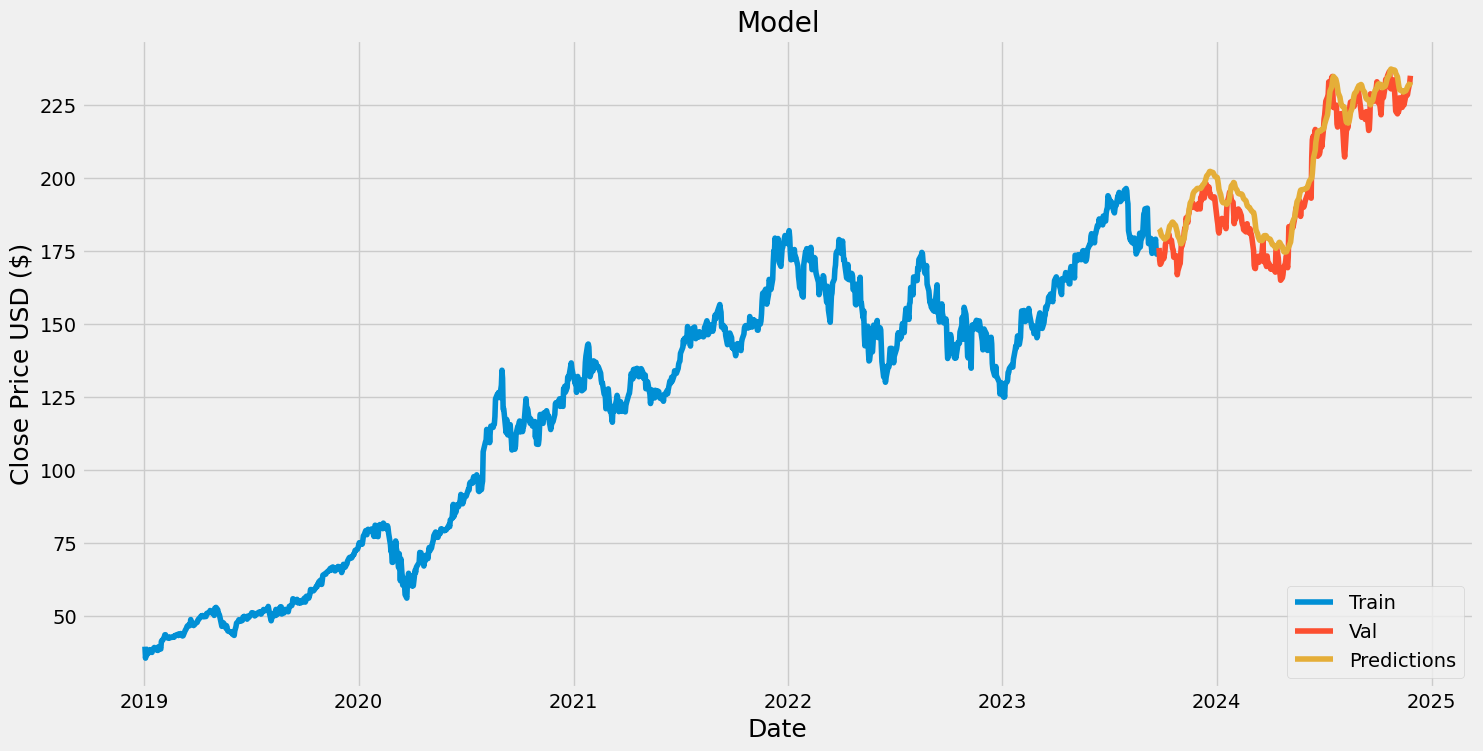

In [87]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


# Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [88]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-09-25 00:00:00+00:00,176.080002,182.639145
2023-09-26 00:00:00+00:00,171.960007,182.400284
2023-09-27 00:00:00+00:00,170.429993,181.884506
2023-09-28 00:00:00+00:00,170.690002,181.139175
2023-09-29 00:00:00+00:00,171.210007,180.363754
...,...,...
2024-11-20 00:00:00+00:00,229.000000,230.662888
2024-11-21 00:00:00+00:00,228.520004,231.183777
2024-11-22 00:00:00+00:00,229.869995,231.645584


In [90]:
# Get the quote
apple_qoute = yf.download("AAPL", start="2019-01-01", end="2024-11-27")

# Create a Pandas DataFrame
new_df = pd.DataFrame(apple_qoute)

#Dropping Tickers
new_df.columns = new_df.columns.droplevel(level='Ticker')

# Create a new dataframe
new_df = new_df.filter(['Close'])

# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test data set to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[234.0122]]


In [91]:
# Get the quote
apple_qoute2 = yf.download("AAPL", start="2024-11-28", end="2024-11-28")
print(apple_qoute2['Close'])

[*********************100%***********************]  1 of 1 completed

Ticker                           AAPL
Date                                 
2024-11-27 00:00:00+00:00  234.929993
